In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr
import matplotlib.patches as pc
from matplotlib.collections import LineCollection
%matplotlib inline

In [3]:
# Load history data

h2p0 = mr.MesaData('../2p0M/LOGS/history.data')
h3p0 = mr.MesaData('../3p0M/LOGS/history.data')
h4p0 = mr.MesaData('../4p0M/LOGS/history.data')
h5p0 = mr.MesaData('../5p0M/LOGS/history.data')
h6p0 = mr.MesaData('../6p0M/LOGS/history.data')
h7p0 = mr.MesaData('../7p0M/LOGS/history.data')
h8p0 = mr.MesaData('../8p0M/LOGS/history.data')
h9p0 = mr.MesaData('../9p0M/LOGS/history.data')

# Scrub history

h4p0.remove_backups(dbg=True)
h5p0.remove_backups(dbg=True)
h6p0.remove_backups(dbg=True)
h7p0.remove_backups(dbg=True)
h8p0.remove_backups(dbg=True)
h9p0.remove_backups(dbg=True)

Scrubbing history...
Already clean!
Scrubbing history...
Already clean!
Scrubbing history...
Already clean!
Scrubbing history...
Already clean!
Scrubbing history...
Already clean!
Scrubbing history...
Already clean!


In [4]:
# Radii

radius_2p0 = h2p0.data('log_R')
radius_3p0 = h3p0.data('log_R')
radius_4p0 = h4p0.data('log_R')
radius_5p0 = h5p0.data('log_R')
radius_6p0 = h6p0.data('log_R')
radius_7p0 = h7p0.data('log_R')
radius_8p0 = h8p0.data('log_R')
radius_9p0 = h9p0.data('log_R')

# Star ages

star_age_2p0 = h2p0.data('star_age') / (10**6)
star_age_3p0 = h3p0.data('star_age') / (10**6)
star_age_4p0 = h4p0.data('star_age') / (10**6)
star_age_5p0 = h5p0.data('star_age') / (10**6)
star_age_6p0 = h6p0.data('star_age') / (10**6)
star_age_7p0 = h7p0.data('star_age') / (10**6)
star_age_8p0 = h8p0.data('star_age') / (10**6)
star_age_9p0 = h9p0.data('star_age') / (10**6)

#print(max(radius_2p0))
#print(radius_2p0.argmax())
# Evolution until He-shell burning. Carbon is not ignited at the centre
radius_2p0 = radius_2p0[:226]
star_age_2p0 = star_age_2p0[:226]
radius_3p0 = radius_3p0[:294]
star_age_3p0 = star_age_3p0[:294]
#print(max(radius_2p0))

In [5]:
history_files = [h2p0, h3p0, h4p0, h5p0, h6p0, h7p0, h8p0, h9p0]
grid_mass = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
center_c12 = []
star_age = []
log_R = []
star_mass = []
luminosity = []
Teff = []

for i in range(len(history_files)):
    center_c12.append(history_files[i].data('center_c12'))
    star_age.append(history_files[i].data('star_age'))
    log_R.append(history_files[i].data('log_R'))
    star_mass.append(history_files[i].data('star_mass'))
    luminosity.append(history_files[i].data('log_L'))
    Teff.append(history_files[i].data('log_Teff'))
    
star_age[0] = star_age[0][:226]
star_age[1] = star_age[1][:294]


log_R_temp = log_R[0]
log_R_temp = log_R_temp[:226]
log_R[0] = log_R_temp

log_R_temp = log_R[1]
log_R_temp = log_R_temp[:294]
log_R[1] = log_R_temp

star_age_temp = star_age[0]
star_age_temp = star_age_temp[:226]
star_age[0] = star_age_temp

star_age_temp = star_age[1]
star_age_temp = star_age_temp[:294]
star_age[1] = star_age_temp

star_mass_temp = star_mass[0]
star_mass_temp = star_mass_temp[:226]
star_mass[0] = star_mass_temp

star_mass_temp = star_mass[1]
star_mass_temp = star_mass_temp[:294]
star_mass[1] = star_mass_temp

lum_temp = luminosity[0]
lum_temp = lum_temp[:226]
luminosity[0] = lum_temp

lum_temp = luminosity[1]
lum_temp = lum_temp[:294]
luminosity[1] = lum_temp

Teff_temp = Teff[0]
Teff_temp = Teff_temp[:226]
Teff[0] = Teff_temp

Teff_temp = Teff[1]
Teff_temp = Teff_temp[:294]
Teff[1] = Teff_temp


/users/schanlar/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


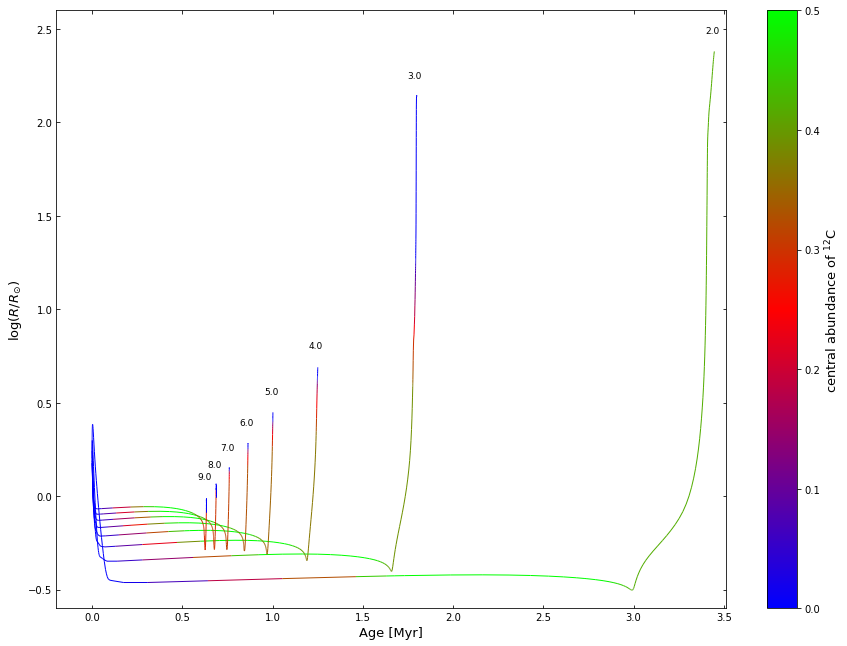

In [6]:
fig1 = plt.figure(figsize = (15,11))
ax1 = fig1.add_subplot(111)
n=len(history_files)
color=iter(plt.cm.nipy_spectral(np.linspace(0,1,n)))
for i in range(0,n):
    #c=next(color)
    #ax1.semilogx(star_age[i], log_R[i], linewidth=1, c=c)
    points = np.array([star_age[i]/1e6, log_R[i]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap=plt.get_cmap('brg'),
                    norm=plt.Normalize(0, 0.5))
    lc.set_array(center_c12[i])
    lc.set_linewidth(1)
    plt.gca().add_collection(lc)
    bla = len(star_age[i])
    ax1.annotate(grid_mass[i], xy=(star_age[i][bla-1]/1e6-0.05, log_R[i][bla-1]+0.1),fontsize = 9)
#ax1.annotate("M$_\odot$", xy=(star_age[0][blu-1]/1e6-0.02, log_R[0][blu-1]+0.22),fontsize = 9, rotation = 45)    
ax1.set_xlabel('Age [Myr]', fontsize = 13)
ax1.set_ylabel(r'$\log(R / R_{\odot}$)', fontsize = 13)
ax1.set_xlim(-0.2, 3.51)
ax1.set_ylim(-0.6, 2.6)
#ax1.invert_xaxis() # esto invierte
#ax1.set_xscale('linear')
blu = len(star_age[0])

ax1.tick_params(axis = 'both', direction='in', top='on', right='on')


#plt.title('Radius evolution')
cb = plt.colorbar(lc)
cb.set_label(label = r'central abundance of $^{12}$C', fontsize = 13)


#plt.savefig('radius_evolution_gradient.png', dpi=300)

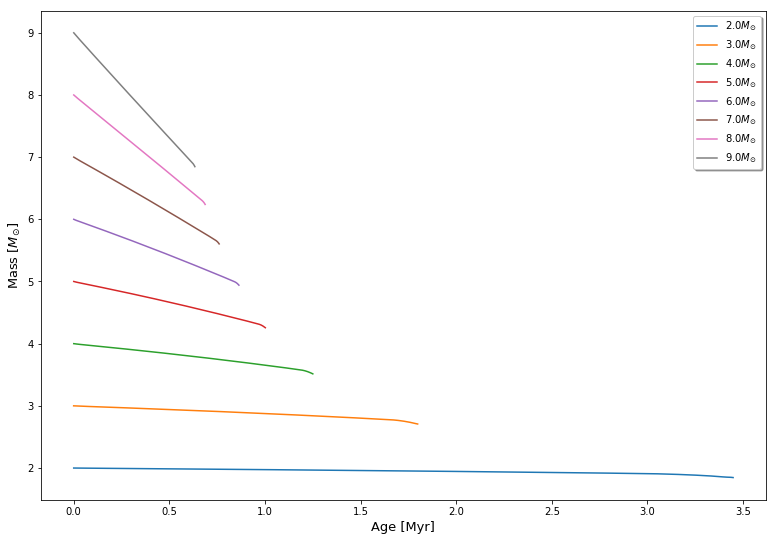

In [7]:
# Mass vs Age: stellar wind has a more profound impact on more massive stars

plt.figure(figsize = (13,9))

for i in range(0,n):
    plt.plot(star_age[i]/(10**6), star_mass[i], label = str(grid_mass[i])+r'$M_{\odot}$')

    
plt.xlabel('Age [Myr]', fontsize = 13)
plt.ylabel(r'Mass [$M_{\odot}$]', fontsize = 13)
legend = plt.legend(loc = 'upper right', shadow = True)

#plt.savefig('mass_age.png', dpi = 300)

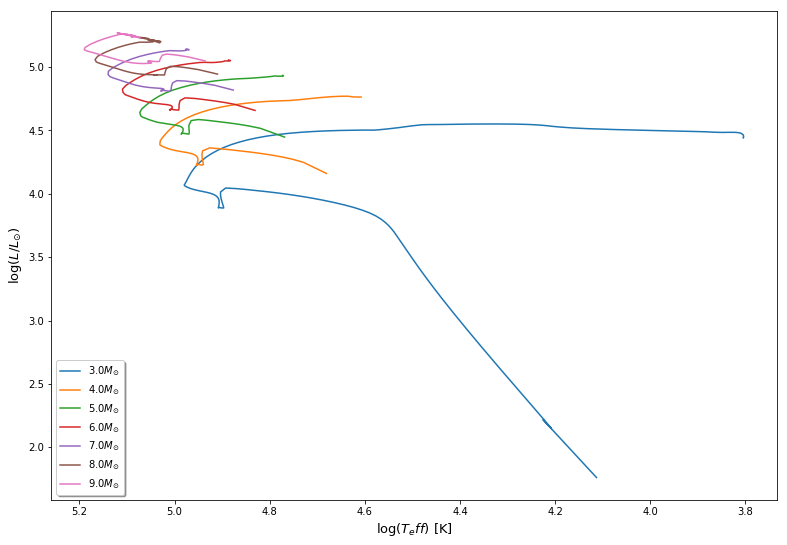

In [11]:
# H-R diagram

plt.figure(figsize = (13,9))
plt.gca().invert_xaxis()

plt.xlabel(r'$\log(T_eff)$ [K]', fontsize = 13)
plt.ylabel(r'$\log(L / L_{\odot})$', fontsize = 13)

for i in range(1, len(luminosity)):
    plt.plot(Teff[i], luminosity[i], label = str(grid_mass[i])+r'$M_{\odot}$')
    
legend = plt.legend(loc = "lower left", shadow = True)
